In [1]:
# that library help to fetch online data
import pandas_datareader as pdr

In [ ]:
5a73aa42dea7b9c3432e70f862587612ae6b9219

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = '5a73aa42dea7b9c3432e70f862587612ae6b9219')

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-10-06 00:00:00+00:00,155.30,155.49,154.5600,154.970,16423749,36.845444,36.890522,36.669877,36.767151,65694996,0.0,1.0
1,AAPL,2017-10-09 00:00:00+00:00,155.84,156.73,155.4850,155.810,16200129,36.973561,37.184716,36.889336,36.966443,64800516,0.0,1.0
2,AAPL,2017-10-10 00:00:00+00:00,155.90,158.00,155.1000,156.055,15456331,36.987796,37.486028,36.797994,37.024570,61825324,0.0,1.0
3,AAPL,2017-10-11 00:00:00+00:00,156.55,156.98,155.7500,155.970,16607693,37.142011,37.244030,36.952208,37.004404,66430772,0.0,1.0
4,AAPL,2017-10-12 00:00:00+00:00,156.00,157.37,155.7299,156.350,16045720,37.011522,37.336559,36.947439,37.094560,64182880,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-09-28 00:00:00+00:00,149.84,150.6414,144.840,147.64,146691387,149.84,150.6414,144.840,147.64,146691387,0.0,1.0
1253,AAPL,2022-09-29 00:00:00+00:00,142.48,146.7200,140.680,146.10,128138237,142.48,146.7200,140.680,146.10,128138237,0.0,1.0
1254,AAPL,2022-09-30 00:00:00+00:00,138.20,143.1000,138.000,141.28,124925274,138.20,143.1000,138.000,141.28,124925274,0.0,1.0
1255,AAPL,2022-10-03 00:00:00+00:00,142.45,143.0700,137.685,138.21,114311663,142.45,143.0700,137.685,138.21,114311663,0.0,1.0
1256,AAPL,2022-10-04 00:00:00+00:00,146.10,146.2200,144.260,145.03,87830064,146.10,146.2200,144.260,145.03,87830064,0.0,1.0


In [10]:
df1 = df.reset_index()['close']

In [11]:
df1[1228: ]

1228    167.53
1229    170.03
1230    163.62
1231    161.38
1232    158.91
1233    157.22
1234    157.96
1235    155.81
1236    154.53
1237    155.96
1238    154.46
1239    157.37
1240    163.43
1241    153.84
1242    155.31
1243    152.37
1244    150.70
1245    154.48
1246    156.90
1247    153.72
1248    152.74
1249    150.43
1250    150.77
1251    151.76
1252    149.84
1253    142.48
1254    138.20
1255    142.45
1256    146.10
Name: close, dtype: float64

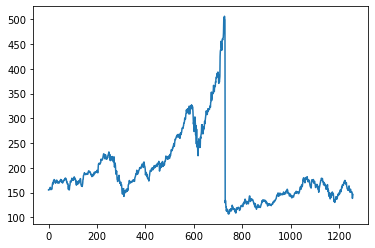

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
# lstm are sensitive to the scale of the data so we apply matrix scaler

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(1257, 1)

In [21]:
df1

array([[0.12137758],
       [0.12273012],
       [0.1228804 ],
       ...,
       [0.07854728],
       [0.08919224],
       [0.09833438]])

In [23]:
#for time series data we divide data in differenet way
training_size = int(len(df1)*0.65)
print("training_size: ", training_size)
test_size = len(df1) - training_size
print('test_size: ', test_size)
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]


training_size:  817
test_size:  440


In [24]:
train_data

array([[1.21377583e-01],
       [1.22730119e-01],
       [1.22880401e-01],
       [1.24508453e-01],
       [1.23130870e-01],
       [1.25610520e-01],
       [1.32849092e-01],
       [1.34326863e-01],
       [1.32548528e-01],
       [1.23080776e-01],
       [1.23757044e-01],
       [1.23556669e-01],
       [1.25886036e-01],
       [1.24157796e-01],
       [1.26662492e-01],
       [1.40788979e-01],
       [1.49981215e-01],
       [1.55792110e-01],
       [1.50407013e-01],
       [1.53462743e-01],
       [1.64458359e-01],
       [1.68841578e-01],
       [1.70244208e-01],
       [1.73825924e-01],
       [1.72924233e-01],
       [1.69893550e-01],
       [1.68140263e-01],
       [1.61552912e-01],
       [1.55892298e-01],
       [1.60951785e-01],
       [1.58572323e-01],
       [1.58146525e-01],
       [1.66061365e-01],
       [1.70619912e-01],
       [1.70644959e-01],
       [1.68440827e-01],
       [1.65886036e-01],
       [1.56894177e-01],
       [1.62830307e-01],
       [1.60826550e-01],


In [26]:
test_data

array([[0.0494928 ],
       [0.06031309],
       [0.06314339],
       [0.05545398],
       [0.05500313],
       [0.06023795],
       [0.05527865],
       [0.05084534],
       [0.05257358],
       [0.0630933 ],
       [0.07521603],
       [0.08072636],
       [0.09036944],
       [0.09097057],
       [0.0882154 ],
       [0.07576706],
       [0.06291797],
       [0.06837821],
       [0.0705072 ],
       [0.06787727],
       [0.07651847],
       [0.07494051],
       [0.07531622],
       [0.07306199],
       [0.07150908],
       [0.07085786],
       [0.07145899],
       [0.06599875],
       [0.06011271],
       [0.0572824 ],
       [0.05768316],
       [0.04798998],
       [0.04763932],
       [0.04636193],
       [0.03544145],
       [0.03611772],
       [0.05247339],
       [0.04578585],
       [0.03812148],
       [0.03328741],
       [0.03651847],
       [0.02384471],
       [0.0356794 ],
       [0.03291171],
       [0.03787101],
       [0.03554164],
       [0.04295554],
       [0.046

In [27]:
#convert array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    datax, datay= [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(datax), np.array(datay)

In [29]:
time_step = 100
x_train, y_train =create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [30]:
print(x_train)

[[0.12137758 0.12273012 0.1228804  ... 0.17921102 0.17853475 0.1707201 ]
 [0.12273012 0.1228804  0.12450845 ... 0.17853475 0.1707201  0.17375078]
 [0.1228804  0.12450845 0.12313087 ... 0.1707201  0.17375078 0.17527865]
 ...
 [0.84561052 0.86179086 0.82820288 ... 0.06294302 0.07476518 0.07020664]
 [0.86179086 0.82820288 0.86462116 ... 0.07476518 0.07020664 0.06732624]
 [0.82820288 0.86462116 0.88465874 ... 0.07020664 0.06732624 0.0647464 ]]


In [31]:
x_train.shape

(716, 100)

In [32]:
x_test.shape

(339, 100)

In [33]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [34]:
x_test.shape, x_train.shape

((339, 100, 1), (716, 100, 1))

In [40]:
x_train[0].shape

(100, 1)

In [36]:
#build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [42]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 790ms/step - loss: 0.0475 - val_loss: 0.0031
Epoch 2/100
12/12 [==============================] - 6s 480ms/step - loss: 0.0144 - val_loss: 0.0058
Epoch 3/100
12/12 [==============================] - 5s 397ms/step - loss: 0.0119 - val_loss: 4.2070e-04
Epoch 4/100
12/12 [==============================] - 5s 450ms/step - loss: 0.0108 - val_loss: 3.2087e-04
Epoch 5/100
12/12 [==============================] - 5s 415ms/step - loss: 0.0095 - val_loss: 6.1663e-04
Epoch 6/100
12/12 [==============================] - 5s 427ms/step - loss: 0.0083 - val_loss: 5.5255e-04
Epoch 7/100
12/12 [==============================] - 5s 402ms/step - loss: 0.0075 - val_loss: 4.7098e-04
Epoch 8/100
12/12 [==============================] - 6s 476ms/step - loss: 0.0079 - val_loss: 2.4788e-04
Epoch 9/100
12/12 [==============================] - 5s 388ms/step - loss: 0.0090 - val_loss: 0.0032
Epoch 10/100
12/12 [==============================] - 3s 289ms/step

12/12 [==============================] - 3s 253ms/step - loss: 0.0014 - val_loss: 2.1432e-04
Epoch 79/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0014 - val_loss: 2.0433e-04
Epoch 80/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0015 - val_loss: 2.0415e-04
Epoch 81/100
12/12 [==============================] - 3s 252ms/step - loss: 0.0043 - val_loss: 2.0089e-04
Epoch 82/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0034 - val_loss: 2.8158e-04
Epoch 83/100
12/12 [==============================] - 3s 258ms/step - loss: 0.0037 - val_loss: 5.8990e-04
Epoch 84/100
12/12 [==============================] - 3s 257ms/step - loss: 0.0031 - val_loss: 7.3268e-04
Epoch 85/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0025 - val_loss: 1.9978e-04
Epoch 86/100
12/12 [==============================] - 3s 288ms/step - loss: 0.0027 - val_loss: 3.1357e-04
Epoch 87/100
12/12 [==============================] - 3s 28

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.2.0'

In [46]:
# lets predict 
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [47]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [48]:
# find error value
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

236.57267419358362

In [49]:
math.sqrt(mean_squared_error(y_test, test_predict))

161.08803143410822

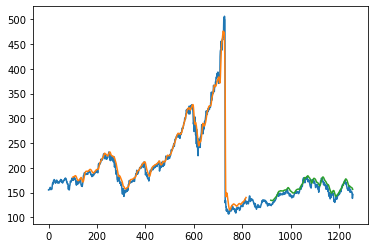

In [50]:
look_back=100
# shift train predict for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predict for ploting 
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data) #to predict future we need previous data 22may and we predict 23 may

440

In [52]:
x_input = test_data[340:].reshape(1,-1)

In [53]:
x_input.shape

(1, 100)

In [55]:
# convert into list
temp_input =list(x_input)
print(temp_input)
temp_input = temp_input[0].tolist()
print(temp_input)

[array([0.08946775, 0.10086412, 0.09693175, 0.10619912, 0.08510958,
       0.07641828, 0.07701941, 0.09084534, 0.08395742, 0.08435817,
       0.09252348, 0.107201  , 0.10519724, 0.10487163, 0.11113338,
       0.096531  , 0.09843456, 0.10487163, 0.10299311, 0.08966813,
       0.07586725, 0.0627176 , 0.06492173, 0.07160927, 0.05815905,
       0.06191609, 0.07271133, 0.07140889, 0.0787226 , 0.08721353,
       0.08721353, 0.07664371, 0.08112711, 0.07484033, 0.0803757 ,
       0.08696306, 0.09036944, 0.09896055, 0.10068879, 0.0952536 ,
       0.09773325, 0.09680651, 0.10427051, 0.10852849, 0.10076393,
       0.11060739, 0.11571697, 0.12150282, 0.1183469 , 0.11549155,
       0.11211021, 0.12510958, 0.12651221, 0.13943644, 0.13693175,
       0.1331747 , 0.14850344, 0.14770194, 0.14654978, 0.14534753,
       0.14547276, 0.15629305, 0.15441453, 0.16345648, 0.1661866 ,
       0.16578585, 0.16959299, 0.16859111, 0.16200376, 0.15211021,
       0.15125861, 0.15201002, 0.15827176, 0.14221666, 0.1366

In [56]:
#demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11718607]
101
1 day input [0.10086412 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941
 0.09084534 0.08395742 0.08435817 0.09252348 0.107201   0.10519724
 0.10487163 0.11113338 0.096531   0.09843456 0.10487163 0.10299311
 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905
 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 

8 day output [[0.13412175]]
9 day input [0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849 0.10076393
 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021
 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344
 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453
 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376
 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614
 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068
 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263 0.11403882
 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556 0.10917971
 0.11003131 0.11251096

16 day output [[0.1585108]]
17 day input [0.10487163 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173
 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226
 0.08721353 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757
 0.08696306 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325
 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697
 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221
 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978
 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866
 0.16578585 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861
 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866
 0.12804008 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623
 0.14174076 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373
 0.1253851  0.11742016 0.11496556 0.10917971 0.11003131 0.11251096
 0.10770194 0.08926738 0.07854728 0.08919224 0.09833438 0.11718607
 0.11621511 0.11708923 0.1

24 day output [[0.1818602]]
25 day input [0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073
 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016
 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738
 0.07854728 0.08919224 0.09833438 0.11718607 0.11621511 0.11708923
 0.1191485  0.12184578 0.12483207 0.12792037 0.13102663 0.13412175
 0.13720125 0.14026861

In [57]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [58]:
len(df1)

1257

In [59]:
df3=df1.tolist()
df3.extend(lst_output)

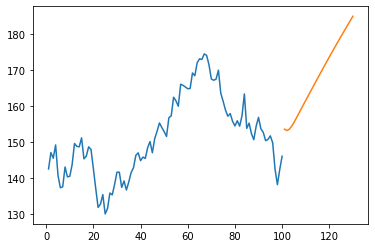

In [61]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

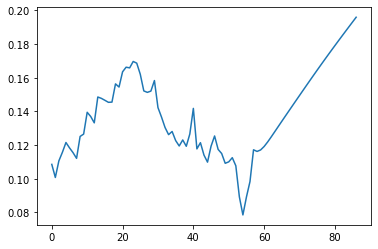

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])